In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#1
x=np.array([20,50,100,150])
y=np.array([4188.0,4178.7,4224.7,4361.8])

def coeffts(x,y):
  m=len(y)
  y=np.array(y)
  x=np.array(x)
  a=y.copy()
  for k in range(1,m): #a[0]==y[0]이므로 a[1]부터
    a[k:m]=(a[k:m]-a[k-1])/(x[k:m]-x[k-1])
  return a

def evalpoly(a,xdata,x):
  n=len(xdata)-1 #n-1 degree
  p=a[n]
  
  for k in range(1,n+1):
    p=a[n-k]+(x-xdata[n-k])*p
  return p


In [5]:
a=coeffts(x,y)
pred_y=evalpoly(a,x,120)
pred_y

4267.6888461538465

In [8]:
print(f'{(pred_y-4260)/4260*100:.4}%')

0.1805%


In [14]:
#2
x=np.array([0,1,2,3,4])
y=np.array([1.2,16.3,21.6,17.1,2.8])

%cd /content/drive/MyDrive/21-1/Computational Physics/data/myModules/myModules

/content/drive/MyDrive/21-1/Computational Physics/data/myModules/myModules


In [15]:
from LUdecomp3 import *
def curvatures(xData,yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n])/(xData[0:n-1] - xData[1:n]) \
            - 6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    
    return k

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =int((iLeft + iRight)/2)
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
            
    return y

In [26]:
k=curvatures(x,y)
k2=np.array([-9.8]*5)

In [27]:
draw_x=np.arange(0,4.1,0.1)
spline_y=[evalSpline(x,y,k,i) for i in draw_x]
cubic_spline_y=[evalSpline(x,y,k2,i) for i in draw_x]

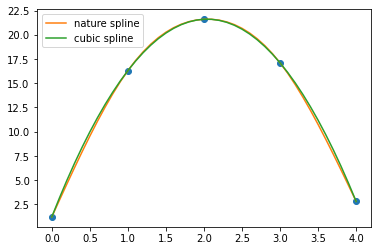

In [45]:
plt.plot(x,y,'o')
plt.plot(draw_x,spline_y,label='nature spline')
plt.plot(draw_x,cubic_spline_y,label='cubic spline')
plt.legend()

In [ ]:
#등가속운동을 하므로 cubic spline이 더 정확하다.

In [ ]:
#2-2

In [42]:
pfit1=np.polyfit(x,y,2)
line=np.poly1d(pfit1)

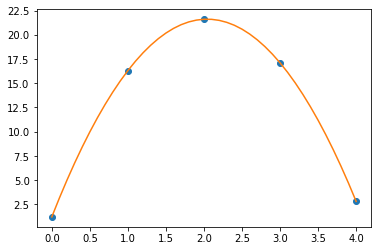

In [43]:
plt.plot(x,y,'o')
plt.plot(draw_x,line(draw_x))

In [40]:
#데이터가 많아질경우 모든 점을 지나는 
#스플라인보다는 추세를 따라가는 회귀분석이 정확하다.

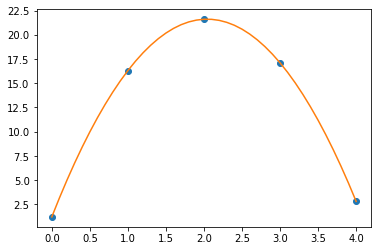

In [44]:
#2-3
from scipy.interpolate import UnivariateSpline
spl=UnivariateSpline(x,y)
plt.plot(x,y,'o')
plt.plot(draw_x,spl(draw_x))

3.1  
보간법은 주어진 데이터를 모두 지나는 함수를 찾는다.  
회귀분석은 주어진 데이터를 반드시 지나는 것이 아니라 오차를 최소화하는 함수를 찾는다. 

3.2  
스플라인 보간법은 점과점사이 구간을 저차식 다항식으로 연결하여 매끄럽게 만든다.  
다항식 보간법은 n차 다항식으로 구간을 연결한다. 진동의 우려가 있다.